# Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download Data

In [2]:
imdb, metadata = tfds.load('imdb_reviews/subwords8k',
                           with_info=True,
                           as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteY1BEKF/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteY1BEKF/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteY1BEKF/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
metadata

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [4]:
print(metadata.name)

num_classes = metadata.features['label'].num_classes
print(num_classes)

class_names = metadata.features['label'].names
print(class_names)

imdb_reviews
2
['neg', 'pos']


In [5]:
imdb

{'test': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'train': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>}

In [6]:
train_dataset, test_dataset = imdb['train'], imdb['test']
len(train_dataset), len(test_dataset)

(25000, 25000)

# Tokenization

In [7]:
tokenizer = metadata.features['text'].encoder
tokenizer

<SubwordTextEncoder vocab_size=8185>

In [8]:
len(tokenizer.subwords)

7928

In [9]:
tokenizer.vocab_size

8185

In [10]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [11]:
for s,l in train_dataset:
  print(s)
  print(l)
  break

tf.Tensor(
[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975], shape=(163,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


In [12]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [13]:
train_dataset = train_dataset.shuffle(buffer_size=BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(batch_size=BATCH_SIZE, 
                                           padded_shapes=tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(batch_size=BATCH_SIZE,
                                         padded_shapes=tf.compat.v1.data.get_output_shapes(test_dataset))

In [14]:
for s,l in train_dataset:
  print(s[0])
  print(l[0])
  break

tf.Tensor(
[8002 7968  123  165   19 2667 1289  629  425    5    9   45    6    1
  193  654  621 6687 7759 2233  171   48    1 3537 7968 8044   24   10
   16   10   17  133 1368 7485   50 1015    8   56 2187    4  556  946
    5   41 7214 6794  172  361    7 6453   49  229    3  133 1368 2045
 1341   52 5874 7961  144 7724  112  917    7   45    6   30 1579    8
    5    4  266  533   46  284    1 7485   50 1856 3150 7961   11  101
    5  253  138    7    1 1080 5546 7968 8044    2  145    1  212  172
  144  265  446 6688 4048   36   43    1 3616    3   19 4274    5   30
  708 2084 7961   29    1  627 6003    5    1 3616 7961    9  508 2867
 1274    3  324  187 5425    8   29 5978   36    7    1 5042    2   53
  109 7968   21  359    1  266  533    5 6168   49  161    6  308   51
   14  306    3  275  772  359  161   72    1 3616    2  338 1082  746
   76   11    1 1818 7968    8 1351    5 5851 2070   94    1 6285 7961
 5352    3   69  144 7724  112  917   25    4 3045  125   22    1 

# Create & Train the Model

In [15]:
vocab_size = tokenizer.vocab_size
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,
                              output_dim=embedding_dim),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          20544     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 548,609
Trainable params: 548,609
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 10

history = model.fit(train_dataset, 
                    epochs=num_epochs, 
                    validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 80s 132ms/step - loss: 0.4670 - accuracy: 0.7667 - val_loss: 0.3224 - val_accuracy: 0.8736
Epoch 2/10
391/391 [==============================] - 19s 47ms/step - loss: 0.2302 - accuracy: 0.9145 - val_loss: 0.3073 - val_accuracy: 0.8795
Epoch 3/10
391/391 [==============================] - 16s 39ms/step - loss: 0.1738 - accuracy: 0.9374 - val_loss: 0.3435 - val_accuracy: 0.8754
Epoch 4/10
391/391 [==============================] - 15s 37ms/step - loss: 0.1422 - accuracy: 0.9486 - val_loss: 0.3780 - val_accuracy: 0.8681
Epoch 5/10
391/391 [==============================] - 15s 37ms/step - loss: 0.1157 - accuracy: 0.9601 - val_loss: 0.4345 - val_accuracy: 0.8671
Epoch 6/10
391/391 [==============================] - 14s 34ms/step - loss: 0.0990 - accuracy: 0.9664 - val_loss: 0.4873 - val_accuracy: 0.8629
Epoch 7/10
391/391 [==============================] - 14s 33ms/step - loss: 0.0804 - accuracy: 0.9737 - val_loss: 0.5454 - val_accuracy

In [18]:
model.evaluate(test_dataset)

391/391 [==============================] - 4s 10ms/step - loss: 0.7652 - accuracy: 0.8509


[0.7651677131652832, 0.8508800268173218]

# Visualize Loss & Accuracy

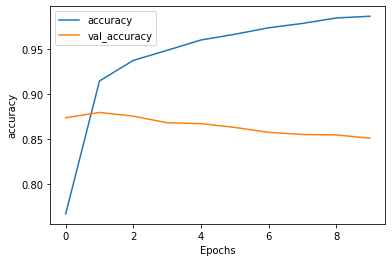

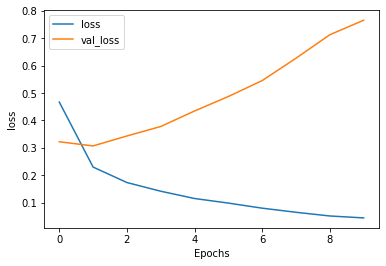

In [19]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# To visualize Embedding

In [20]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>